# import


In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

root_path = f".."
data_path = f"{root_path}/data"
data_olist_path = f"{data_path}/olist"

In [2]:
def get_var_name(variable):
    globals_dict = globals()

    return [var_name for var_name in globals_dict if globals_dict[var_name] is variable]

class EDA:

    def __init__(
            self:pd.DataFrame,
            df,
            idx=None,
            x=None,
            y=None,
            fig_col_len=2,
            ) -> pd.DataFrame:

        self.idx = idx
        if idx != None:
            temp = df.set_index(idx)
            self.df = temp
        else:
            self.df = df

        if x == None:
            self.x = df.columns.to_list()
        else:
            self.x = x
            
        self.y = y
        self.fig_col_len = fig_col_len
        
    def print_title(body, br=2, bp="┌▣ ", hr=" ---- ---- ---- ----"):

        """
        body : 내용
        bp : bullet point, 글머리 기호
        hr : Horizontal Rule, 수평선
        """

        class ff:
            PURPLE = "\033[95m"
            CYAN = "\033[96m"
            DARKCYAN = "\033[36m"
            BLUE = "\033[94m"
            GREEN = "\033[92m"
            YELLOW = "\033[93m"
            RED = "\033[91m"
            BOLD = "\033[1m"
            UNDERLINE = "\033[4m"
            END = "\033[0m"

        print("\n" * br + ff.BOLD + bp + ff.UNDERLINE + body + ff.END + hr)
        

    def Check_df(df):

        EDA.print_title("""df.shape""")
        print(df.shape)


        EDA.print_title("""df.info()""")
        print(df.info())

        EDA.print_title("""df.head()""")
        display(df.head())

        EDA.print_title("""df.columns.to_list()""")
        print(df.columns.to_list())
        
    def Check(self) -> pd.DataFrame:

        df = self.df
        EDA.Check_df(df)    
        
    def Summary_df(df):
        
        EDA.print_title("""df.describe().T""")
        display(df.describe().T)

        try:
            EDA.print_title("""df.describe(include=['O'])""")
            display(df.describe(include=["O"]))
        except:
            pass

        # 결측치
        df_temp = df.isna()
        EDA.print_title("""df.isna().sum()""")
        display(df_temp.sum().to_frame())

        EDA.print_title("""sns.heatmap(data=df.isna())""")
        sns.heatmap(data=df.isna(), cmap='Greys')
        plt.title("""sns.heatmap(data=df.isna())""", fontsize=20)
        plt.show()

        EDA.print_title("df.isna().mean()")
        display(df_temp.mean().to_frame())

    def Summary(self):
        
        df = self.df
        EDA.Summary_df(df)

    def mv(self) -> None:

        df = self.df

        fig_col_len = self.fig_col_len
        import math
        fig_row_len = math.ceil(len(self.x) / fig_col_len)
        
        sns.pairplot(data=df, height=len(self.x)*4)
        

        df_corr = df.corr()
        EDA.print_title("""df.corr()""")
        display(df_corr)
        EDA.print_title("""sns.heatmap(data=df.corr(), annot=True, fmt=".2f")""")
        plt.figure(figsize=(20,7))
        sns.heatmap(data=df_corr, annot=True, fmt=".2f", annot_kws={"size": 14}, cmap="Blues")
        plt.show()
        

# 리뷰 번역

## Data Load

In [27]:
df_raw = pd.read_csv(f"{data_olist_path}/olist_order_reviews_dataset.csv", index_col=0)
EDA.Check_df(df_raw)



┌▣ df.shape ---- ---- ---- ----
(99224, 6)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
Index: 99224 entries, 7bc2406110b926393aa56f80a40eba40 to efe49f1d6f951dd88b51e6ccd4cc548f
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 99224 non-null  object
 1   review_score             99224 non-null  int64 
 2   review_comment_title     11568 non-null  object
 3   review_comment_message   40977 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.3+ MB
None


┌▣ df.head() ---- ---- ---- ----


order_id  \
review_id                                                            
7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

                                  review_score review_comment_title  \
review_id                                                             
7bc2406110b926393aa56f80a40eba40             4                  NaN   
80e641a11e56f04c1ad469d5645fdfde             5                  NaN   
228ce5500dc1d8e020d8d1322874b6f0             5                  NaN   
e64fb393e7b32834bb789ff8bb30750e             5                  NaN   
f7c4243c7fe1938f181bec41a392bdeb             5                  NaN   

                                                             review_comment_message  \
review_id                                                                             
7bc2406110b926393aa56f80a40eba40                                                NaN   
80e641a11e56f04c1ad469d5645fdfde                                                NaN   
228ce5500dc1d8e020d8d1322874b6f0                                                NaN   
e64fb393e7b32834bb789ff8bb30750e              Recebi bem antes do prazo estipulado.   
f7c4243c7fe1938f181bec41a392bdeb  Parabéns lojas lannister adorei comprar pela I...   

                                 review_creation_date review_answer_timestamp  
review_id                                                                      
7bc2406110b926393aa56f80a40eba40  2018-01-18 00:00:00     2018-01-18 21:46:59  
80e641a11e56f04c1ad469d5645fdfde  2018-03-10 00:00:00     2018-03-11 03:05:13  
228ce5500dc1d8e020d8d1322874b6f0  2018-02-17 00:00:00     2018-02-18 14:36:24  
e64fb393e7b32834bb789ff8bb30750e  2017-04-21 00:00:00     2017-04-21 22:02:06  
f7c4243c7fe1938f181bec41a392bdeb  2018-03-01 00:00:00     2018-03-02 10:26:53



┌▣ df.columns.to_list() ---- ---- ---- ----
['order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


## 결측치 제거



┌▣ df.shape ---- ---- ---- ----
(42706, 6)


┌▣ df.info() ---- ---- ---- ----
<class 'pandas.core.frame.DataFrame'>
Index: 42706 entries, e64fb393e7b32834bb789ff8bb30750e to efe49f1d6f951dd88b51e6ccd4cc548f
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   order_id                 42706 non-null  object
 1   review_score             42706 non-null  int64 
 2   review_comment_title     42706 non-null  object
 3   review_comment_message   42706 non-null  object
 4   review_creation_date     42706 non-null  object
 5   review_answer_timestamp  42706 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB
None


┌▣ df.head() ---- ---- ---- ----


order_id  \
review_id                                                            
e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   

                                  review_score review_comment_title  \
review_id                                                             
e64fb393e7b32834bb789ff8bb30750e             5                        
f7c4243c7fe1938f181bec41a392bdeb             5                        
8670d52e15e00043ae7de4c01cc2fe06             4            recomendo   
4b49719c8a200003f700d3d986ea1a19             4                        
3948b09f7c818e2d86c9a546758b2335             5      Super recomendo   

                                                             review_comment_message  \
review_id                                                                             
e64fb393e7b32834bb789ff8bb30750e              Recebi bem antes do prazo estipulado.   
f7c4243c7fe1938f181bec41a392bdeb  Parabéns lojas lannister adorei comprar pela I...   
8670d52e15e00043ae7de4c01cc2fe06  aparelho eficiente. no site a marca do aparelh...   
4b49719c8a200003f700d3d986ea1a19    Mas um pouco ,travando...pelo valor ta Boa.\r\n   
3948b09f7c818e2d86c9a546758b2335  Vendedor confiável, produto ok e entrega antes...   

                                 review_creation_date review_answer_timestamp  
review_id                                                                      
e64fb393e7b32834bb789ff8bb30750e  2017-04-21 00:00:00     2017-04-21 22:02:06  
f7c4243c7fe1938f181bec41a392bdeb  2018-03-01 00:00:00     2018-03-02 10:26:53  
8670d52e15e00043ae7de4c01cc2fe06  2018-05-22 00:00:00     2018-05-23 16:45:47  
4b49719c8a200003f700d3d986ea1a19  2018-02-16 00:00:00     2018-02-20 10:52:22  
3948b09f7c818e2d86c9a546758b2335  2018-05-23 00:00:00     2018-05-24 03:00:01



┌▣ df.columns.to_list() ---- ---- ---- ----
['order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


┌▣ df.describe().T ---- ---- ---- ----


count  mean   std   min   25%   50%   75%   max
review_score 42706.000 3.703 1.603 1.000 2.000 5.000 5.000 5.000



┌▣ df.describe(include=['O']) ---- ---- ---- ----


order_id review_comment_title  \
count                              42706                42706   
unique                             42559                 4528   
top     8e17072ec97ce29f0e1f111e598b0c85                        
freq                                   3                31138   

       review_comment_message review_creation_date review_answer_timestamp  
count                   42706                42706                   42706  
unique                  36160                  622                   42362  
top                            2018-05-19 00:00:00     2018-02-26 15:53:18  
freq                     1729                  218                       3



┌▣ df.isna().sum() ---- ---- ---- ----


0
order_id                 0
review_score             0
review_comment_title     0
review_comment_message   0
review_creation_date     0
review_answer_timestamp  0



┌▣ sns.heatmap(data=df.isna()) ---- ---- ---- ----


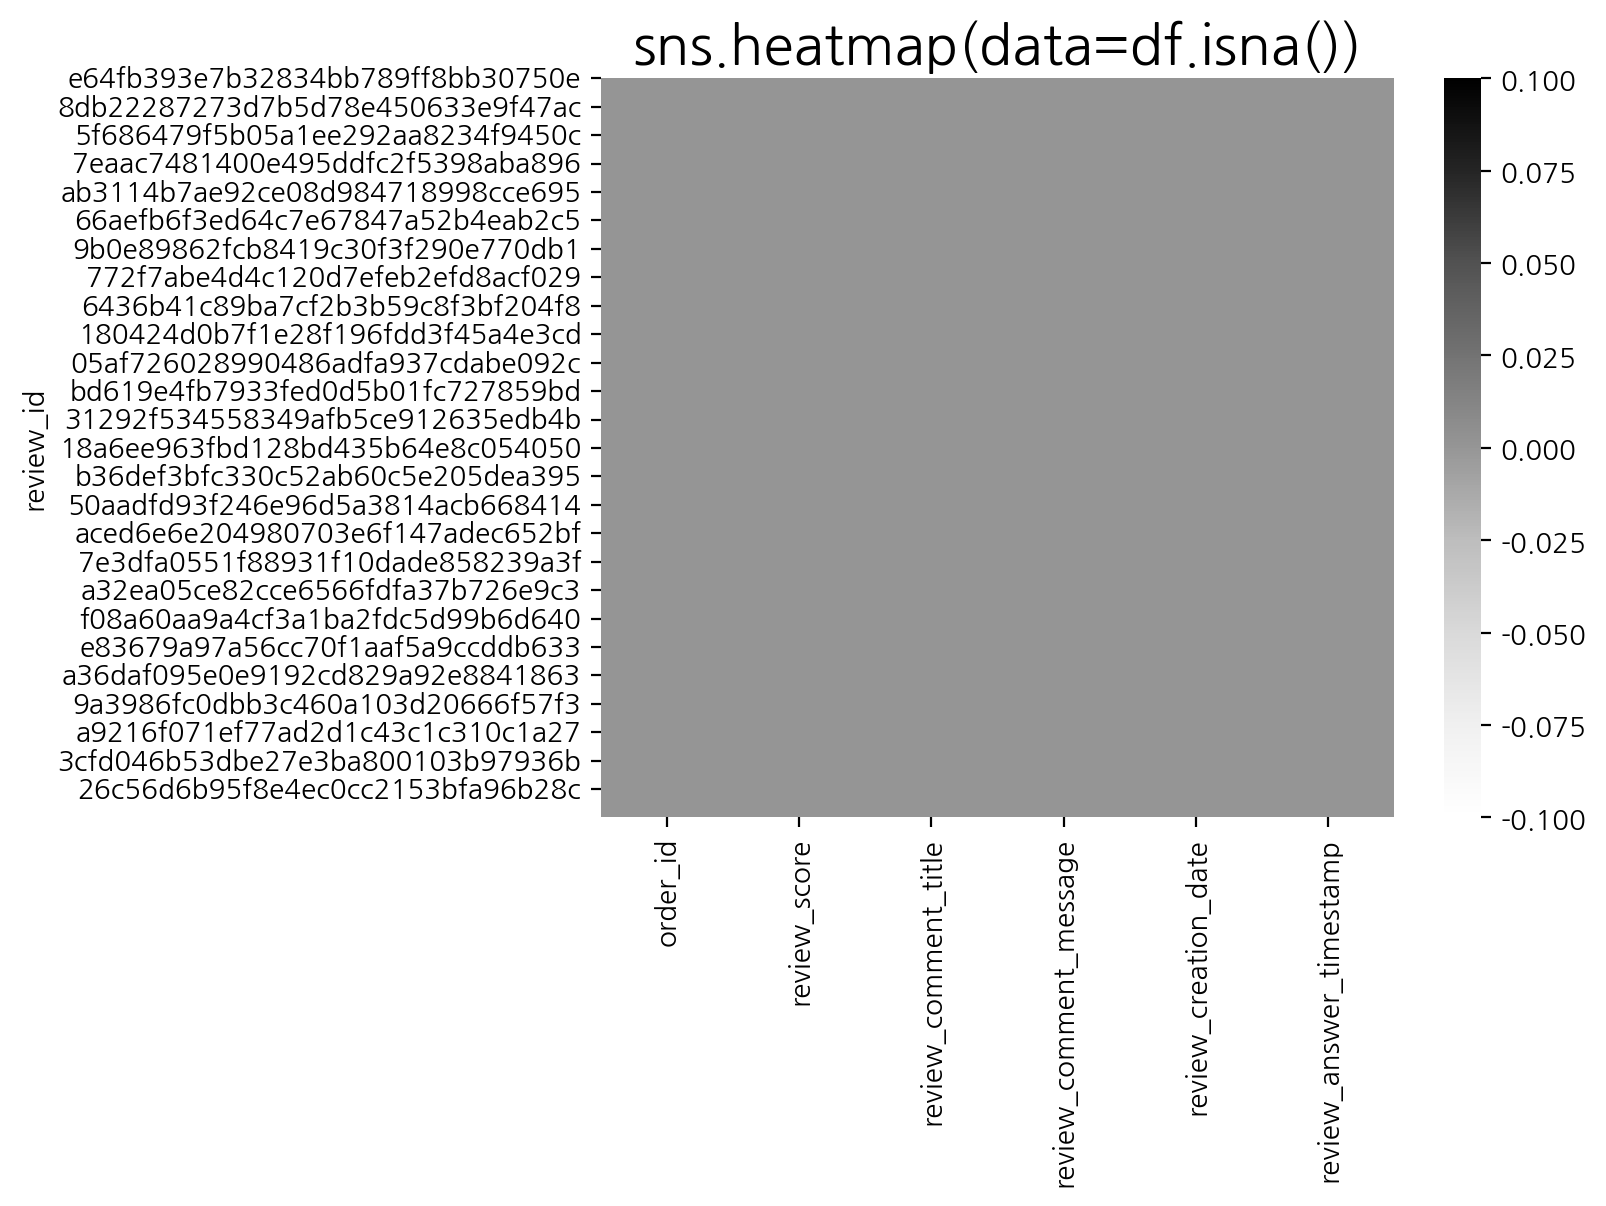



┌▣ df.isna().mean() ---- ---- ---- ----


0
order_id                0.000
review_score            0.000
review_comment_title    0.000
review_comment_message  0.000
review_creation_date    0.000
review_answer_timestamp 0.000

In [28]:
df = df_raw.copy()
df = df.fillna("")
df = df[(df["review_comment_title"] != "") | (df["review_comment_message"] != "")]
EDA.Check_df(df)
EDA.Summary_df(df)

In [29]:
# from tqdm import tqdm
# from googletrans import Translator
# from time import sleep

# df_trans = df.copy()

# def trans(sentence):

#     translator = Translator()
#     sleep(0.01)
    
#     try:
#         translated = translator.translate(sentence, "ko", translator.detect(sentence).lang)
#         return translated.text
    
#     except:
#         return None

# trans_list = ["review_comment_title", "review_comment_message"]

# df_trans_csv = pd.DataFrame()
# for i in tqdm(range(0, df_trans.shape[0] + 1)):   # df_trans.shape[0]
#     df_new = df_trans[i:i+1]
#     for j in trans_list:
#         df_new[f"{j}_ko"] = df_new[j].apply(trans)

#     df_trans_csv = pd.concat([df_trans_csv, df_new])
#     df_trans_csv.to_csv(f"{data_path}/olist_order_reviews_dataset_ko.csv")

# df_trans_csv

In [30]:
# # 컴 종료
# import os
# os.system('shutdown -s -f')